# X-13ARIMA-SEATS

In [7]:
#install.packages("seasonal")
install.packages("readxl")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpXC1lRO/downloaded_packages


In [8]:
library(seasonal)
library(readr)
library(readxl)

In [76]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Terminos de intercambio mensual.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
data$TERMS <- as.numeric(data$TERMS)

head(data)

Fecha,TERMS
<date>,<dbl>
1996-01-01,59.27447
1996-02-01,58.70797
1996-03-01,58.94663
1996-04-01,61.09653
1996-05-01,59.49050
1996-06-01,57.45501


In [77]:
# data_ts <- ts(data$PBI, start = c(1994, 1), frequency = 12) 
data_ts <- ts(data$TERMS, start = c(1996, 1), frequency = 12)
class(data_ts)
head(data_ts)

[1] "ts"

[1] 59.27447 58.70797 58.94663 61.09653 59.49050 57.45501


Call:
seas(x = data_ts)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
AR-Nonseasonal-01  0.04157    0.05396    0.77    0.441

SEATS adj.  ARIMA: (1 1 0)  Obs.: 344  Transform: log
AICc:  1533, BIC:  1541  QS (no seasonality in final):1.877  
Box-Ljung (no autocorr.): 22.46   Shapiro (normality): 0.9958  
Messages generated by X-13:
Warnings:
- Series should not be a candidate for seasonal adjustment
  because the spectrum of the original series (Table A1 or B1)
  has no visually significant seasonal peaks.



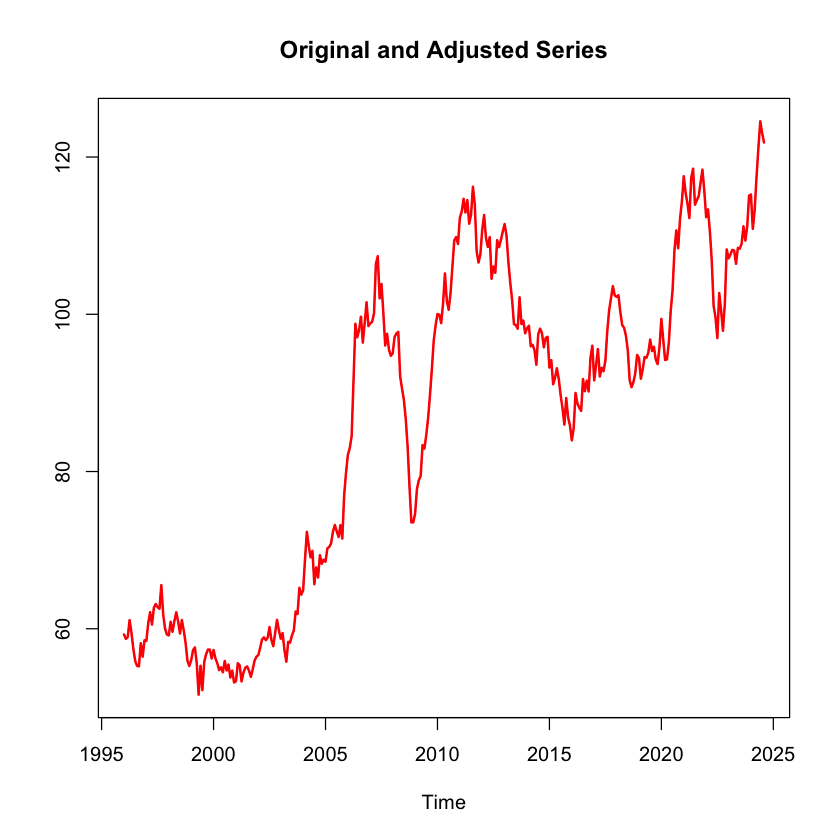

In [78]:
fit <- seas(data_ts)
summary(fit)
plot(fit)

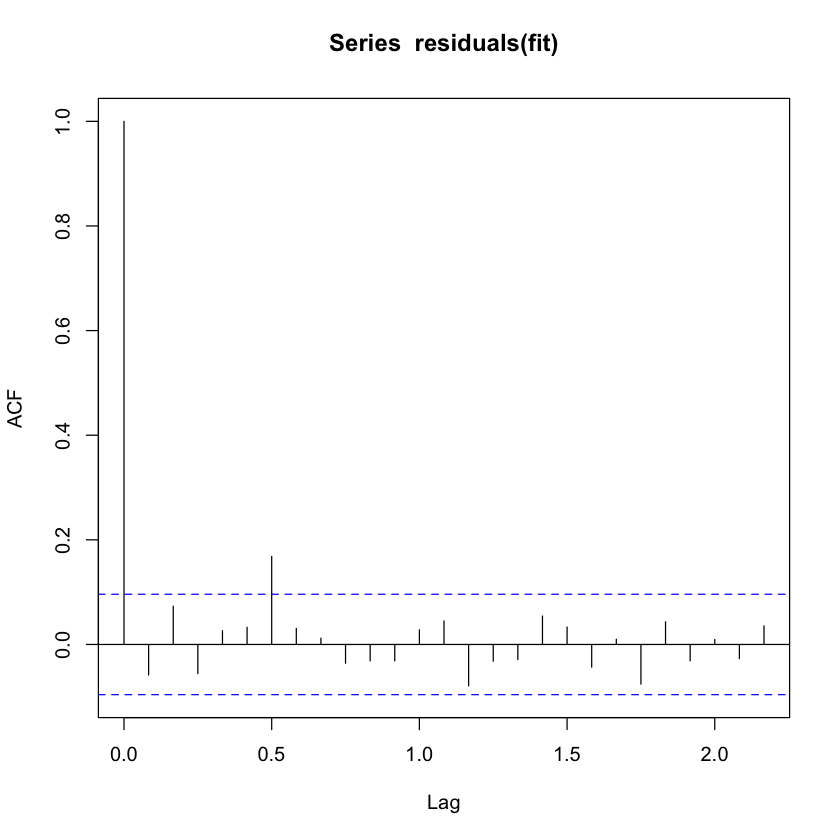

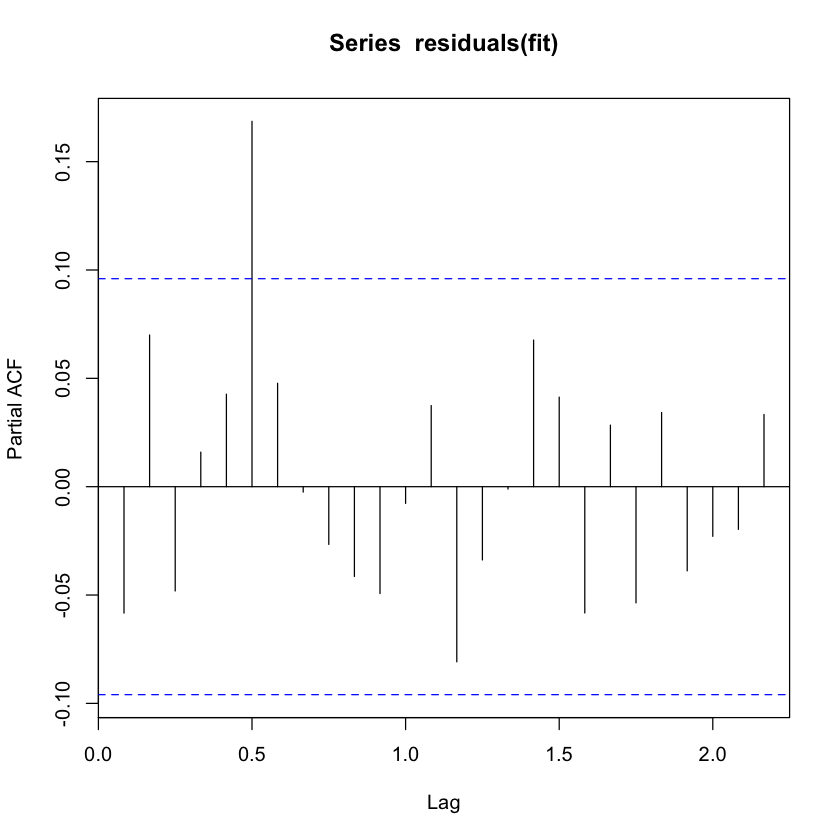

In [73]:
acf(residuals(fit))
pacf(residuals(fit))

In [74]:
adjusted_series <- final(fit)

library(dplyr)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_TCR.xlsx")

In [30]:
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'


